## Case Study 3: Building and Evaluating Predictive Models

## Decision Tree

In [11]:
def data_prep():
   
    df = loadCsv()
    df = convertDataTypes(df)
    df = mapToNumericType(df)
    # one-hot encoding
    df = pd.get_dummies(df)
    
    return df


In [70]:
import pandas as pd
def loadCsv():
    df = pd.read_csv('Project datasets/D2.csv')
    return df

In [13]:
def convertDataTypes(df):
    # change DemCluster from interval/integer to nominal/str
    df['contacts_count'] = df['contacts_count'].astype('int64')
    df['house_count'] = df['house_count'].astype('int64')
    df['alcohol'] = df['alcohol'].astype('int64')
    return df

In [16]:
#mapping categorical to numeric type
def mapToNumericType(df):
    # mapping

    insurance_map = {'yes':1, 'no': 0}
    df['insurance'] = df['insurance'].map(insurance_map)

    immigrant_map = {'native':0, 'immigrant': 1}
    df['immigrant'] = df['immigrant'].map(immigrant_map)
    return df


In [71]:
#data preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = data_prep()
print(df)
# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

X_mat = X.to_numpy()
X_mat

# setting random state
rs = 10

#splitting
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)


      height  weight  insurance  immigrant  alcohol  contacts_count  \
0        174      64          1          0        3               7   
1        182     118          1          0        0               7   
2        184     118          1          0        0               7   
3        164      72          1          0       14               7   
4        192      92          1          0        0               7   
...      ...     ...        ...        ...      ...             ...   
6105     174      72          1          0        3               5   
6106     164     130          0          0        3              21   
6107     162      56          1          0        0              10   
6108     158      70          1          1        3              14   
6109     170      86          1          0        0              11   

      house_count  worried  covid19_positive  gender_female  ...  \
0               2        4                 1              0  ...   
1          

In [19]:
#Train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [7]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.6563011456628478


In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1070
           1       0.59      0.57      0.58       763

    accuracy                           0.66      1833
   macro avg       0.65      0.64      0.64      1833
weighted avg       0.65      0.66      0.66      1833



In [20]:
# Get the trained decision tree model
tree_model = model.tree_

# Calculate the number of nodes in the tree
num_nodes = tree_model.node_count
print("Number of Nodes:", num_nodes)

# Calculate the number of rules
num_rules = num_nodes - 1  # Subtract 1 for the root node
print("Number of Rules:", num_rules)


Number of Nodes: 2035
Number of Rules: 2034


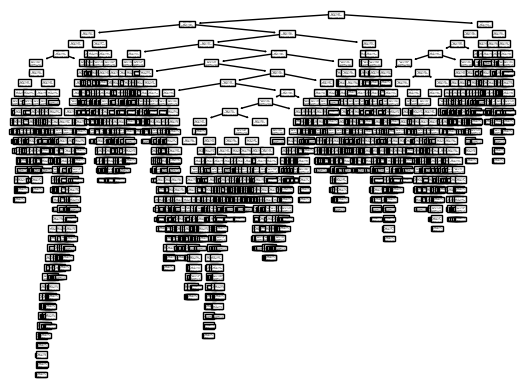

In [29]:
from sklearn import tree
from matplotlib import pyplot as plt

tree.plot_tree(model)
plt.show()

In [30]:
# Get the feature index used for the first split
first_split_feature_index = tree_model.feature[0]
print("Variable used for the first split:", first_split_feature_index)

# Get the feature names from the dataset
feature_names = X.columns

# Get the variable name for the first split feature
first_split_feature_name = feature_names[first_split_feature_index]
print("Variable name used for the first split:", first_split_feature_name)


Variable used for the first split: 32
Variable name used for the first split: income_high


In [11]:
#parameters used
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [31]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

weight : 0.13448730592459374
height : 0.09842049942386638
income_high : 0.09381629165155812
contacts_count : 0.09012080939679801
alcohol : 0.0654091218369155
worried : 0.06275907805734465
house_count : 0.06089118258466686
immigrant : 0.01699785174206276
insurance : 0.01680915366072135
working_travel non critical : 0.01525021209663523
working_stopped : 0.01520031371343996
age_50_60 : 0.014950199083402048
blood_type_unknown : 0.014745538733990404
age_60_70 : 0.014581574173085886
age_20_30 : 0.014325809191473051
working_never : 0.01402995208649671
smoking_never : 0.013729348919585972
age_30_40 : 0.013096714604056765
race_white : 0.01307207049257637
blood_type_ap : 0.01255384842980117


## GridSearchCV

In [13]:
#find for small max_depth value-before appyling GridSearchCV
#retrain with a small max_depth limit

# model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
# model_small.fit(X_train, y_train)

# print("Train accuracy:", model_small.score(X_train, y_train))
# print("Test accuracy:", model_small.score(X_test, y_test))

# y_pred = model_small.predict(X_test)
# print(classification_report(y_test, y_pred))

In [14]:
# importances = model_small.feature_importances_
# feature_names = X.columns

# # sort them out in descending order
# indices = np.argsort(importances)
# indices = np.flip(indices, axis=0)

# # limit to 20 features
# indices = indices[:20]

# for i in indices:
#     print(feature_names[i], ':', importances[i])

In [32]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)


{'mean_fit_time': array([0.00391958, 0.00218606, 0.00188651, 0.00179594, 0.00289674,
       0.00288088, 0.00292571, 0.0029484 , 0.00392146, 0.0038455 ,
       0.00383971, 0.00383782, 0.00488801, 0.00491402, 0.0049165 ,
       0.00496893, 0.00601637, 0.00591426, 0.00590575, 0.00584328,
       0.00730071, 0.00771306, 0.0173619 , 0.00702124, 0.00813863,
       0.00797203, 0.00769613, 0.00769086, 0.00884123, 0.00872757,
       0.00862768, 0.00861752, 0.00966105, 0.00936184, 0.0090647 ,
       0.00880201, 0.01044428, 0.01006567, 0.0096271 , 0.00929551,
       0.01125903, 0.01073065, 0.01005607, 0.0096343 , 0.01178286,
       0.01108568, 0.0105027 , 0.0099659 , 0.01234066, 0.01148241,
       0.01069121, 0.0101388 , 0.01282167, 0.01186121, 0.0110642 ,
       0.01035664, 0.01326175, 0.01225452, 0.01121168, 0.01053848,
       0.00177224, 0.00172601, 0.00172484, 0.00171952, 0.00283401,
       0.00289652, 0.00284283, 0.00283523, 0.00390785, 0.00388935,
       0.00392954, 0.00389147, 0.00495491, 0

In [33]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


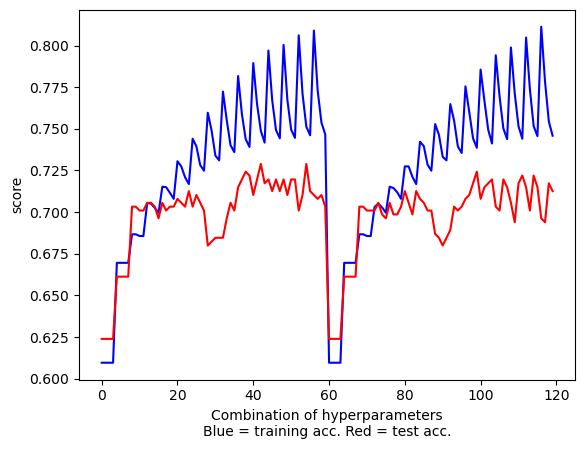

In [34]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

There are a total of 120 combinations of hyperparameters (2 x 15 x 5) meaning that there are 120 models. Let us now focus only on the max_depth to understand the bias and variance for the fixed criterion = 'entropy and min_sample_leaf = 10.

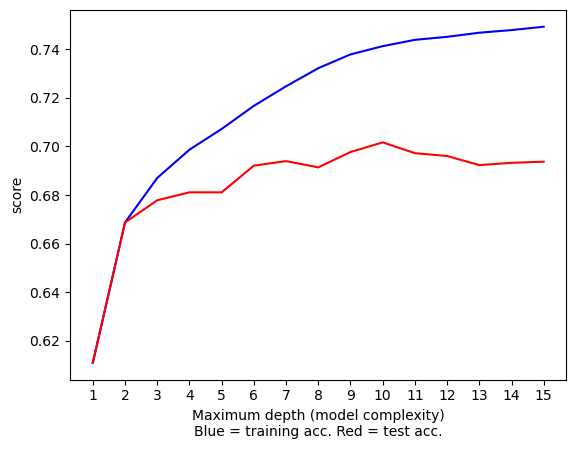

In [40]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==20)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

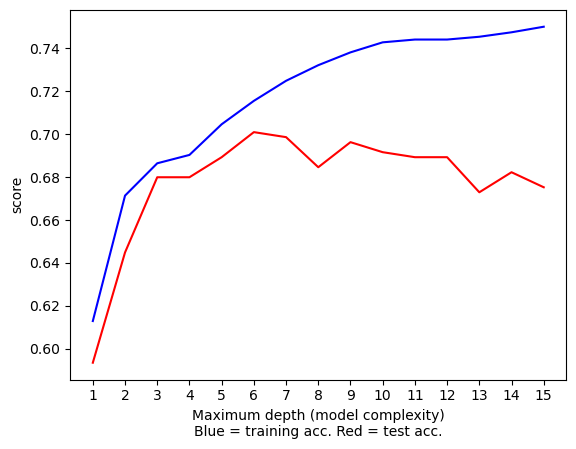

In [41]:
### Enter your code here for split1
### Solution
train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

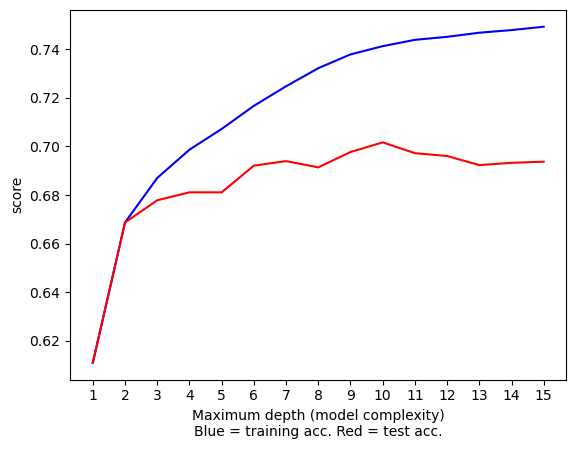

In [42]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [39]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


In [43]:
#the best model with 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10 gives the same results as below
# model_small = DecisionTreeClassifier(max_depth=6, criterion= 'entropy',min_samples_leaf=10 ,random_state=rs)
# model_small.fit(X_train, y_train)

# print("Train accuracy:", model_small.score(X_train, y_train))
# print("Test accuracy:", model_small.score(X_test, y_test))

cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.7397708674304418
Test accuracy: 0.6993998908892526


In [23]:
y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1070
           1       0.65      0.62      0.63       763

    accuracy                           0.70      1833
   macro avg       0.69      0.69      0.69      1833
weighted avg       0.70      0.70      0.70      1833



In [45]:
# Get the best decision tree model from the grid search
best_model = cv_1.best_estimator_

In [46]:
# Get the tree structure of the best model
tree_model = best_model.tree_

# Calculate the number of nodes in the tree
num_nodes = tree_model.node_count
print("Number of Nodes:", num_nodes)

# Calculate the number of rules
num_rules = num_nodes - 1  # Subtract 1 for the root node
print("Number of Rules:", num_rules)


Number of Nodes: 205
Number of Rules: 204


In [ ]:
# Build the tree model and visualaise
# from sklearn import tree
# from matplotlib import pyplot as plt

# fig, ax = plt.subplots(figsize=(100, 100)) 
# tree.plot_tree(best_model)
# plt.show()

In [57]:
# Get the feature importances from the best model
feature_importances = best_model.feature_importances_

# Get the index of the variable used for the first split
first_split_feature_index = feature_importances.argmax()

# Get the name of the variable used for the first split
first_split_feature_name = feature_names[first_split_feature_index]

print("Variable used for the first split:", first_split_feature_name)


Variable used for the first split: income_high


In [58]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = best_model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
#indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

income_high : 0.30626247035633675
worried : 0.15615780835126597
weight : 0.10453414789573583
contacts_count : 0.08342891214858107
house_count : 0.05314041694702182
height : 0.0330969471201622
alcohol : 0.03158501679579123
insurance : 0.02419288841685868
age_60_70 : 0.021633502838132396
age_70_80 : 0.021462601188936448
income_med : 0.019686218227148635
race_white : 0.019451380810982
immigrant : 0.01844413206232241
working_home : 0.016725639111378338
blood_type_ap : 0.01343246591749301
age_40_50 : 0.01296604329426314
blood_type_unknown : 0.01229621871837209
working_travel non critical : 0.010270391815597255
smoking_never : 0.007809665252126233
gender_male : 0.00711985760566741
working_stopped : 0.006942138122618678
working_never : 0.004493225653517196
age_30_40 : 0.00439566198382532
blood_type_op : 0.0038338178160279473
age_20_30 : 0.003365474402791057
blood_type_on : 0.0019382695172785857
gender_female : 0.0013346876297682685
gender_other : 0.0
age_10_20 : 0.0
age_100_110 : 0.0
age_0_10

## compare models

## Using accuracy

In [63]:
#check best model by accuarcy
y_pred_dt = model.predict(X_test) # defualt paramteres
y_pred_dt_cv = cv_1.predict(X_test) #GridSearchCV

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.6563011456628478
Accuracy score on test for DT_optimal 0.6993998908892526


## Area Under the Curve

In [65]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on Target covid19_positive (0 = negative, 1 = positive). the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t')
    
    

Probability produced by decision tree for each class vs actual prediction on Target covid19_positive (0 = negative, 1 = positive). the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.28751311647429173 	 0.7124868835257083 	
0.8301886792452831 	 0.16981132075471697 	
0.9642857142857143 	 0.03571428571428571 	
1.0 	 0.0 	
0.28751311647429173 	 0.7124868835257083 	
0.6774193548387096 	 0.3225806451612903 	
0.28751311647429173 	 0.7124868835257083 	
0.28751311647429173 	 0.7124868835257083 	
0.6 	 0.4 	
0.7333333333333333 	 0.26666666666666666 	
0.7922077922077922 	 0.2077922077922078 	
0.28751311647429173 	 0.7124868835257083 	
0.28751311647429173 	 0.7124868835257083 	
0.4634146341463415 	 0.5365853658536586 	
0.72 	 0.28 	
0.28751311647429173 	 0.7124868835257083 	
0.48854961832061067 	 0.5114503816793893 	
0.28751311647429173 	 0.7124868835257083 	
0.64 	 0.36 	
0.7857142857142857 	 0.21428571428571427 	


In [66]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6437494641172941
ROC index on test for DT_optimal: 0.7428007986183413


In [67]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

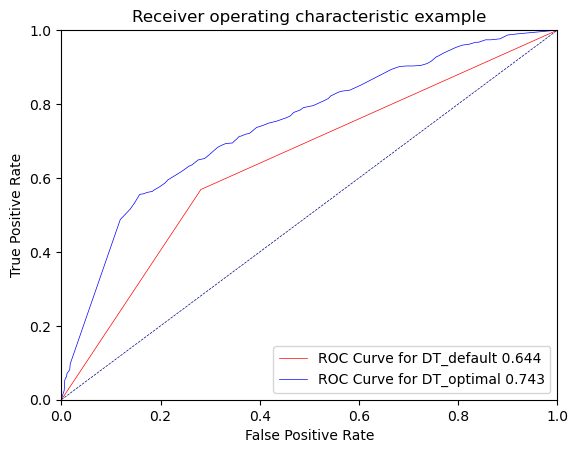

In [68]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [69]:
##save output

import pickle
dt_best = cv_1
with open('DecisionTree.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)